In [37]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# Other essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split,cross_val_score, KFold,learning_curve
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_rows', 250)


In [38]:
df = pd.read_csv('../data/CarPrice_Assignment_cleaned.csv')
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,0,1,0,2,0,88.6000,168.8000,64.1000,48.8000,...,5,3.4700,2.6800,9.0000,111,5000,21,27,220157430.0000,0
1,1,0,1,0,2,0,88.6000,168.8000,64.1000,48.8000,...,5,3.4700,2.6800,9.0000,111,5000,21,27,269181000.0000,0
2,1,0,1,2,2,0,94.5000,171.2000,65.5000,52.4000,...,5,2.6800,3.4700,9.0000,154,5000,19,26,269181000.0000,0
3,1,0,0,3,1,0,99.8000,176.6000,66.2000,54.3000,...,5,3.1900,3.4000,10.0000,102,5500,24,30,227580300.0000,1
4,1,0,0,3,0,0,99.4000,176.6000,66.4000,54.3000,...,5,3.1900,3.4000,8.0000,115,5500,18,22,284679300.0000,1
5,1,0,1,3,1,0,99.8000,177.3000,66.3000,53.1000,...,5,3.1900,3.4000,8.5000,110,5500,19,25,248788500.0000,1
6,1,0,0,3,1,0,105.8000,192.7000,71.4000,55.7000,...,5,3.1900,3.4000,8.5000,110,5500,19,25,288920940.0000,1
7,1,0,0,4,1,0,105.8000,192.7000,71.4000,55.7000,...,5,3.1900,3.4000,8.5000,110,5500,19,25,308660880.0000,1
8,1,1,0,3,1,0,105.8000,192.7000,71.4000,55.9000,...,5,3.1300,3.4000,8.3000,140,5500,17,20,389496750.0000,1
9,1,1,1,2,0,0,99.5000,178.2000,67.9000,52.0000,...,5,3.1300,3.4000,7.0000,160,5500,16,22,291354450.4380,1


In [39]:
X = df.drop('price', axis=1)
y = df['price']

categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
], remainder='passthrough')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42))
])

xgb_pipeline.fit(X_train, y_train)
y_pred = xgb_pipeline.predict(X_test)
r2_xgb_nokfold = r2_score(y_test, y_pred)

In [42]:
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(max_depth=20,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=100,random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
r2_rf_nokfold = r2_score(y_test, y_pred_rf)

In [43]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [44]:
xgb_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42))
])

scores_xgb_kfold = cross_val_score(xgb_model, X, y, cv=kfold, scoring='r2')
r2_xgb_kfold = scores_xgb_kfold.mean()

In [45]:
rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(max_depth=20,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=100,random_state=42))
])

scores_rf_kfold = cross_val_score(rf_model, X, y, cv=kfold, scoring='r2')
r2_rf_kfold = scores_rf_kfold.mean()

In [46]:
print("R² XGB (Tanpa KFold):", r2_xgb_nokfold)
print("R² RF  (Tanpa KFold):", r2_rf_nokfold)
print("R² XGB (Dengan KFold):", r2_xgb_kfold)
print("R² RF  (Dengan KFold):", r2_rf_kfold)

R² XGB (Tanpa KFold): 0.929396667592933
R² RF  (Tanpa KFold): 0.9381214731450486
R² XGB (Dengan KFold): 0.9217008973446049
R² RF  (Dengan KFold): 0.9302593697589792


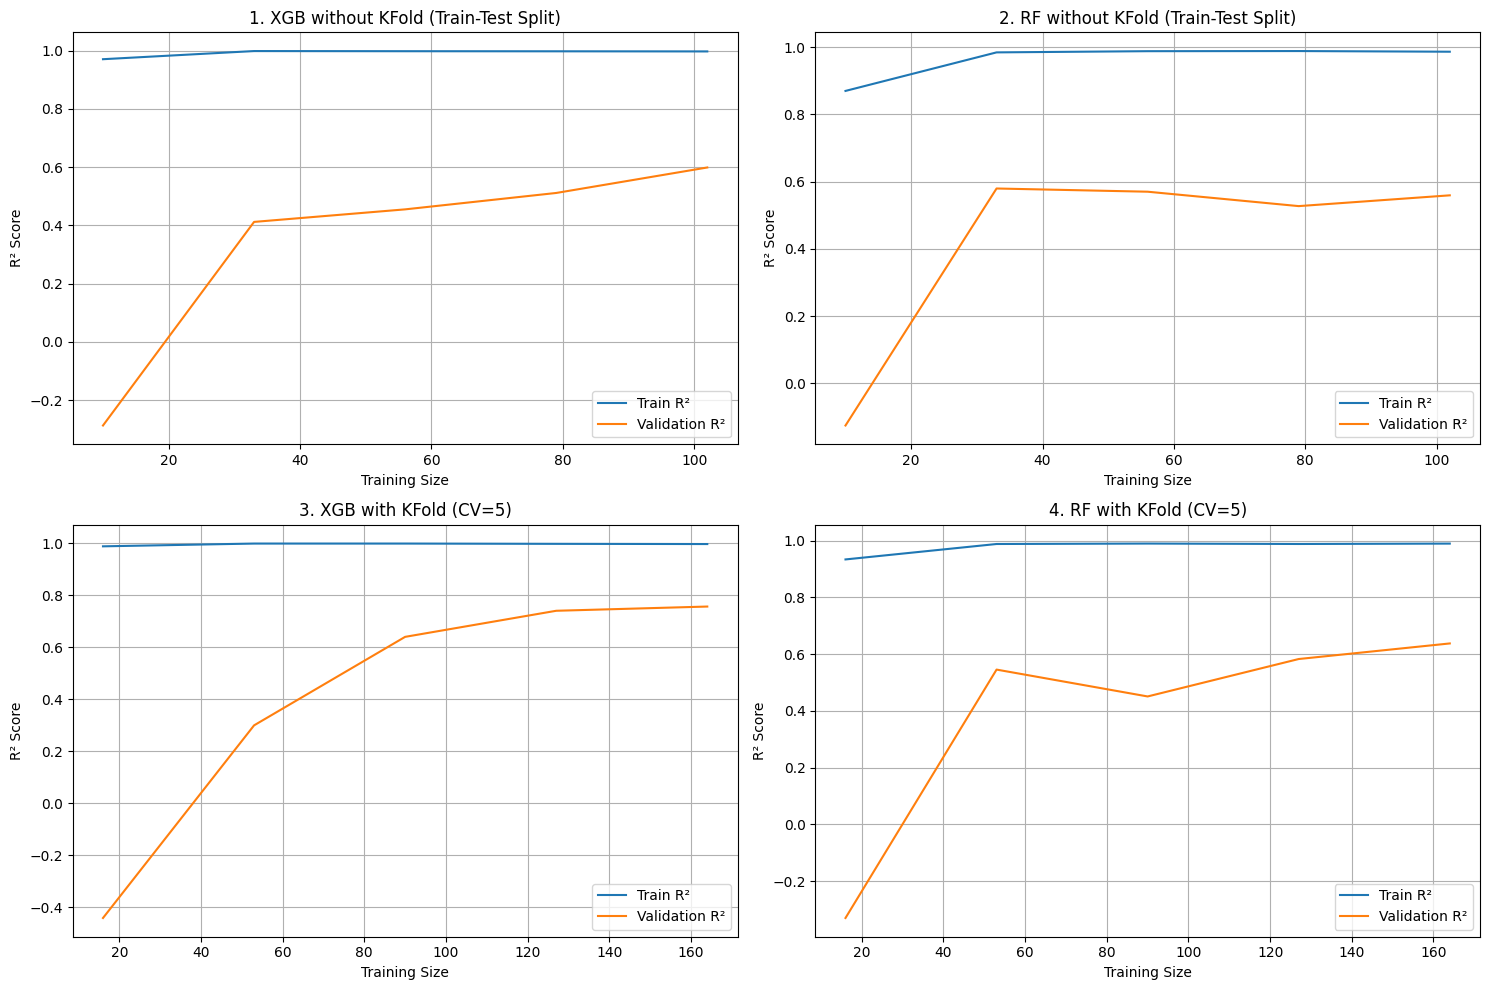

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
model_titles = [
    "1. XGB without KFold (Train-Test Split)",
    "2. RF without KFold (Train-Test Split)",
    "3. XGB with KFold (CV=5)",
    "4. RF with KFold (CV=5)"
]
pipelines = [xgb_pipeline, rf_pipeline, xgb_model, rf_model]

# Loop untuk 4 plot
for i, ax in enumerate(axes.ravel()):
    model = pipelines[i]
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5 if i >= 2 else 2,  # gunakan 2 hanya untuk cepat jika no KFold
        scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, label='Train R²')
    ax.plot(train_sizes, test_scores_mean, label='Validation R²')
    ax.set_title(model_titles[i])
    ax.set_xlabel("Training Size")
    ax.set_ylabel("R² Score")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()
